In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def combine(l_channel, ab_channel, dim=(300, 212), l_float=True, ab_float=True):
    if l_float:
        l_channel = l_channel * 255
    if ab_float:
        ab_channel = ab_channel * 127 + 128

    l_channel = l_channel.astype(np.uint8)
    ab_channel = ab_channel.astype(np.uint8)

    l_channel = cv2.resize(l_channel[0], (dim[1], dim[0]), interpolation=cv2.INTER_AREA if l_channel.shape[1] >= dim[0] else cv2.INTER_CUBIC).reshape(dim[0], dim[1], 1)
    a_channel = cv2.resize(ab_channel[0], (dim[1], dim[0]), interpolation=cv2.INTER_AREA if ab_channel.shape[1] >= dim[0] else cv2.INTER_CUBIC).reshape(dim[0], dim[1], 1)
    b_channel = cv2.resize(ab_channel[1], (dim[1], dim[0]), interpolation=cv2.INTER_AREA if ab_channel.shape[1] >= dim[0] else cv2.INTER_CUBIC).reshape(dim[0], dim[1], 1)

    lab_channel = np.concatenate((l_channel, a_channel, b_channel), axis=2)
    rgb = cv2.cvtColor(lab_channel, cv2.COLOR_LAB2RGB)
    bgr = cv2.cvtColor(lab_channel, cv2.COLOR_LAB2BGR)
    return rgb, bgr

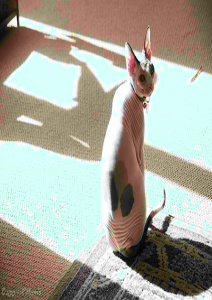

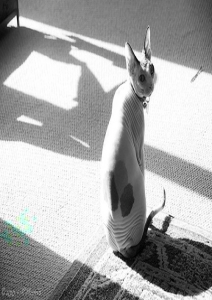

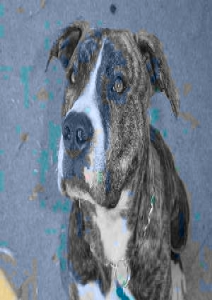

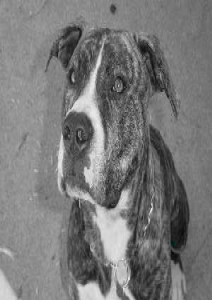

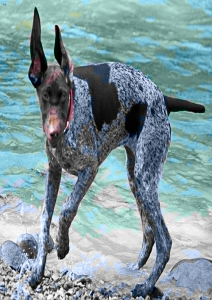

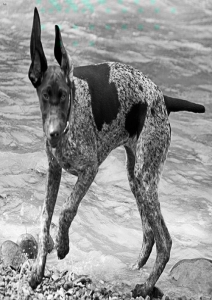

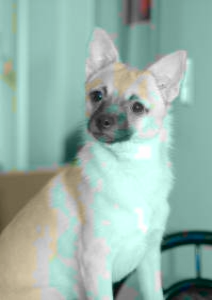

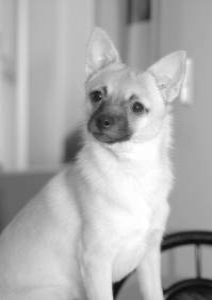

In [18]:
ids = [0, 1, 2, 3]
for id in ids:
  a = np.load(f'/content/drive/MyDrive/PetColorization/output/result_gray.npy', allow_pickle=True)

  b = np.load(f'/content/drive/MyDrive/PetColorization/output/result_true.npy', allow_pickle=True)
  cv2_imshow(combine(a[id], b[id], dim=(300, 212), l_float=False, ab_float=False)[1])

  b = np.load(f'/content/drive/MyDrive/PetColorization/output/result_predict.npy', allow_pickle=True)
  cv2_imshow(combine(a[id], b[id], dim=(300, 212), l_float=False, ab_float=False)[1])